<a href="https://colab.research.google.com/github/Guhan2348519/dl-lab-tasks/blob/main/2348519_DL_Lab1a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

steps to follow :
Initialize weights (W) and bias (b) with random values.
Give the input (A, B) and calculate the weighted sum.
Apply the actuation function to the weighted inputs.
Compare the yield with the specified output and calculate the error.
Alter the weights and bias using the Perceptron learning run the show

In [ ]:
import numpy as np
def unit_step(v):
    """ Heavyside Step function. v must be a scalar """
    if v >= 0:
        return 1
    else:
        return 0
def perceptron(x, w, b):
    """ Function implemented by a perceptron with
        weight vector w and bias b """
    v = np.dot(w, x) + b
    y = unit_step(v)
    return y

In [ ]:

def AND_percep(x):
    w = np.array([1, 1])
    b = -1.5
    return perceptron(x, w, b)

# Testing AND gate
example1 = np.array([1, 1])
example2 = np.array([1, 0])
example3 = np.array([0, 1])
example4 = np.array([0, 0])

print("AND({}, {}) = {}".format(1, 1, AND_percep(example1)))
print("AND({}, {}) = {}".format(1, 0, AND_percep(example2)))
print("AND({}, {}) = {}".format(0, 1, AND_percep(example3)))
print("AND({}, {}) = {}".format(0, 0, AND_percep(example4)))

AND(1, 1) = 1
AND(1, 0) = 0
AND(0, 1) = 0
AND(0, 0) = 0


In [ ]:

def OR_percep(x):
    w = np.array([1, 1])
    b = -0.5
    return perceptron(x, w, b)

# Testing OR gate
example1 = np.array([1, 1])
example2 = np.array([1, 0])
example3 = np.array([0, 1])
example4 = np.array([0, 0])

print("OR({}, {}) = {}".format(1, 1, OR_percep(example1)))
print("OR({}, {}) = {}".format(1, 0, OR_percep(example2)))
print("OR({}, {}) = {}".format(0, 1, OR_percep(example3)))
print("OR({}, {}) = {}".format(0, 0, OR_percep(example4)))

OR(1, 1) = 1
OR(1, 0) = 1
OR(0, 1) = 1
OR(0, 0) = 0


 if there exists a perceptron which can implement the NOT(x) function.
Given two parameters, w and b, it will perform the following computation:
ŷ = ϴ(wx + b) those values exist since we can easily find them: let’s pick w = -1 and b = 0.5.

In [ ]:
def NOT_percep(x):
    return perceptron(x, w=-1, b=0.5)

print("NOT(0) = {}".format(NOT_percep(0)))
print("NOT(1) = {}".format(NOT_percep(1)))

NOT(0) = 1
NOT(1) = 0


In [ ]:

import numpy as np

def unit_step(v):
    """ Heavyside Step function. v must be a scalar """
    if v >= 0:
        return 1
    else:
        return 0

def perceptron(x, w, b):
    """ Function implemented by a perceptron with
        weight vector w and bias b """
    v = np.dot(w, x) + b
    y = unit_step(v)
    return y

def NAND_gate(x):
    weights = np.array([-1, -1])  # Weights for NAND gate
    bias = 2  # Bias for NAND gate
    return 1 - perceptron(x, weights, bias)  # Inverting the output

# Testing NAND gate
print("NAND({}, {}) = {}".format(1, 1, NAND_gate([1, 1])))
print("NAND({}, {}) = {}".format(1, 0, NAND_gate([1, 0])))
print("NAND({}, {}) = {}".format(0, 1, NAND_gate([0, 1])))
print("NAND({}, {}) = {}".format(0, 0, NAND_gate([0, 0])))

NAND(1, 1) = 0
NAND(1, 0) = 0
NAND(0, 1) = 0
NAND(0, 0) = 0


In [ ]:

w1, w2, b = 0.5, 0.5, -1

def activate(x):
    return 1 if x >= 0 else 0

def train_perceptron(inputs, desired_outputs, learning_rate, epochs):
    global w1, w2, b
    for epoch in range(epochs):
        total_error = 0
        for i in range(len(inputs)):
            A, B = inputs[i]
            target_output = desired_outputs[i]
            output = activate(w1 * A + w2 * B + b)
            error = target_output - output
            w1 += learning_rate * error * A
            w2 += learning_rate * error * B
            b += learning_rate * error
            total_error += abs(error)
        if total_error == 0:
            break


inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
desired_outputs = [0, 0, 0, 1]  # Modified for AND gate
learning_rate = 0.1
epochs = 100

train_perceptron(inputs, desired_outputs, learning_rate, epochs)

for i in range(len(inputs)):
    A, B = inputs[i]
    output = activate(w1 * A + w2 * B + b)
    print(f"Input: ({A}, {B})  Output: {output}")

Input: (0, 0)  Output: 0
Input: (0, 1)  Output: 0
Input: (1, 0)  Output: 0
Input: (1, 1)  Output: 1


In [ ]:

def XOR_net(x):
    gate_1 = NAND_gate(x)
    gate_2 = OR_percep(x)
    combined_input = np.array([gate_1, gate_2])
    output = NAND_gate(combined_input)  # Use NAND gate again to combine the results
    return output

# Testing XOR gate
print("XOR({}, {}) = {}".format(1, 1, XOR_net([1, 1])))
print("XOR({}, {}) = {}".format(1, 0, XOR_net([1, 0])))
print("XOR({}, {}) = {}".format(0, 1, XOR_net([0, 1])))
print("XOR({}, {}) = {}".format(0, 0, XOR_net([0, 0])))

XOR(1, 1) = 0
XOR(1, 0) = 0
XOR(0, 1) = 0
XOR(0, 0) = 0


In [ ]:
w1, w2, b = 0.5, 0.5, -1

def activate(x):
    return 1 if x >= 0 else 0

def train_perceptron(inputs, desired_outputs, learning_rate, epochs):
    global w1, w2, b
    for epoch in range(epochs):
        total_error = 0
        for i in range(len(inputs)):
            A, B = inputs[i]
            target_output = desired_outputs[i]
            output = activate(w1 * A + w2 * B + b)
            error = target_output - output
            w1 += learning_rate * error * A
            w2 += learning_rate * error * B
            b += learning_rate * error
            total_error += abs(error)
        if total_error == 0:
            break


inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
desired_outputs = [0, 1, 1, 1] # changed for OR function
learning_rate = 0.1
epochs = 100

train_perceptron(inputs, desired_outputs, learning_rate, epochs)

for i in range(len(inputs)):
    A, B = inputs[i]
    output = activate(w1 * A + w2 * B + b)
    print(f"Input: ({A}, {B})  Output: {output}")

Input: (0, 0)  Output: 0
Input: (0, 1)  Output: 1
Input: (1, 0)  Output: 1
Input: (1, 1)  Output: 1


In [ ]:

import numpy as np

class Perceptron:
    def __init__(self, input_size, learning_rate=0.1, epochs=100):
        self.weights = np.random.rand(input_size + 1)  # Initialize weights randomly
        self.learning_rate = learning_rate
        self.epochs = epochs

    def activate(self, x):
        return 1 if x >= 0 else 0

    def weighted_sum(self, x):
        return np.dot(x, self.weights[1:]) + self.weights[0]

    def train(self, X, y):
        errors = []
        for _ in range(self.epochs):
            total_errors = 0
            for inputs, label in zip(X, y):
                prediction = self.predict(inputs)
                error = label - prediction
                total_errors += abs(error)
                self.weights[1:] += self.learning_rate * error * inputs
                self.weights[0] += self.learning_rate * error
            errors.append(total_errors)
            if total_errors == 0:
                break
        return errors

    def predict(self, inputs):
        return self.activate(self.weighted_sum(inputs))

def AND_gate(x1, x2):
    perceptron = Perceptron(input_size=2)
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y = np.array([0, 0, 0, 1])
    errors = perceptron.train(X, y)
    return perceptron.predict(np.array([x1, x2])), errors

def OR_gate(x1, x2):
    perceptron = Perceptron(input_size=2)
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y = np.array([0, 1, 1, 1])
    errors = perceptron.train(X, y)
    return perceptron.predict(np.array([x1, x2])), errors

def NAND_gate(x1, x2):
    perceptron = Perceptron(input_size=2)
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y = np.array([1, 1, 1, 0])
    errors = perceptron.train(X, y)
    return perceptron.predict(np.array([x1, x2])), errors

def XOR_gate(x1, x2):
    perceptron1 = Perceptron(input_size=2)
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y1 = np.array([0, 1, 1, 0])
    errors1 = perceptron1.train(X, y1)

    perceptron2 = Perceptron(input_size=2)
    y2 = np.array([0, 1, 1, 0])
    errors2 = perceptron2.train(X, y2)

    return perceptron1.predict(np.array([x1, x2])), errors1, perceptron2.predict(np.array([x1, x2])), errors2

# Test the boolean functions
print("AND Gate:")
print("Prediction for (0, 0):", AND_gate(0, 0))
print("Prediction for (0, 1):", AND_gate(0, 1))
print("Prediction for (1, 0):", AND_gate(1, 0))
print("Prediction for (1, 1):", AND_gate(1, 1))

print("\nOR Gate:")
print("Prediction for (0, 0):", OR_gate(0, 0))
print("Prediction for (0, 1):", OR_gate(0, 1))
print("Prediction for (1, 0):", OR_gate(1, 0))
print("Prediction for (1, 1):", OR_gate(1, 1))

print("\nNAND Gate:")
print("Prediction for (0, 0):", NAND_gate(0, 0))
print("Prediction for (0, 1):", NAND_gate(0, 1))
print("Prediction for (1, 0):", NAND_gate(1, 0))
print("Prediction for (1, 1):", NAND_gate(1, 1))

print("\nXOR Gate:")
print("Prediction for (0, 0):", XOR_gate(0, 0))
print("Prediction for (0, 1):", XOR_gate(0, 1))
print("Prediction for (1, 0):", XOR_gate(1, 0))
print("Prediction for (1, 1):", XOR_gate(1, 1))

AND Gate:
Prediction for (0, 0): (0, [3, 3, 4, 2, 3, 1, 0])
Prediction for (0, 1): (0, [3, 3, 2, 2, 1, 0])
Prediction for (1, 0): (0, [3, 3, 3, 1, 0])
Prediction for (1, 1): (1, [3, 1, 1, 1, 0])

OR Gate:
Prediction for (0, 0): (0, [1, 0])
Prediction for (0, 1): (1, [1, 1, 1, 1, 1, 1, 1, 0])
Prediction for (1, 0): (1, [1, 1, 1, 1, 1, 1, 0])
Prediction for (1, 1): (1, [1, 0])

NAND Gate:
Prediction for (0, 0): (1, [1, 1, 2, 2, 2, 2, 2, 3, 2, 1, 0])
Prediction for (0, 1): (1, [1, 1, 2, 3, 2, 1, 0])
Prediction for (1, 0): (1, [1, 1, 1, 1, 2, 2, 2, 2, 1, 0])
Prediction for (1, 1): (0, [1, 1, 1, 1, 1, 1, 2, 2, 3, 3, 2, 1, 0])

XOR Gate:
Prediction for (0, 0): (1, [2, 2, 2, 2, 3, 3, 2, 2, 2, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], 1, [2, 2, 2, 1, 1, 2, 3, 2, 2, 

In [ ]:

import numpy as np

class Perceptron:
    def __init__(self, input_size, learning_rate=0.1, epochs=100):
        self.weights = np.random.rand(input_size + 1)  # Initialize weights randomly
        self.learning_rate = learning_rate
        self.epochs = epochs

    def activate(self, x):
        return 1 if x >= 0 else 0

    def weighted_sum(self, x):
        return np.dot(x, self.weights[1:]) + self.weights[0]

    def train(self, X, y):
        errors = []
        for _ in range(self.epochs):
            total_errors = 0
            for inputs, label in zip(X, y):
                prediction = self.predict(inputs)
                error = label - prediction
                total_errors += abs(error)
                self.weights[1:] += self.learning_rate * error * inputs
                self.weights[0] += self.learning_rate * error
            errors.append(total_errors)
            if total_errors == 0:
                break
        return errors

    def predict(self, inputs):
        return self.activate(self.weighted_sum(inputs))

class MLP:
    def __init__(self, input_size, hidden_size, output_size):
        self.hidden_layer = Perceptron(input_size=input_size, epochs=1000)
        self.output_layer = Perceptron(input_size=hidden_size, epochs=1000)

    def train(self, X, y):
        hidden_outputs = [self.hidden_layer.predict(inputs) for inputs in X]
        output_errors = self.output_layer.train(hidden_outputs, y)
        return output_errors

    def predict(self, inputs):
        hidden_output = self.hidden_layer.predict(inputs)
        return self.output_layer.predict(hidden_output)

# XOR Gate
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

mlp = MLP(input_size=2, hidden_size=2, output_size=1)
errors = mlp.train(X, y)

print("XOR Gate:")
for inputs, label in zip(X, y):
    prediction = mlp.predict(inputs)
    print(f"Prediction for ({inputs[0]}, {inputs[1]}): ({prediction}, {errors})")

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:

def activation(out, threshold):
    if out >= threshold:
        return 1
    else:
        return 0

def perceptron():
    b = [0, 1, 0, 1]
    y = [0, 0, 0, 1]  # Actual Output
    w = [0.1, 0.8]  # Manually assigned weights
    threshold = 1
    learning_rate = 0.5
    a = [1, 0, 1, 1]
    errors = 0

    print("Initial Weights: " + str(w))

    for i in range(4):
        summation = a[i] * w[0] + b[i] * w[1]
        o = activation(summation, threshold)
        errors += abs(o - y[i])

    print("Number of Errors: " + str(errors))

    # Perceptron Learning Algorithm
    while errors != 0:
        errors = 0
        for i in range(4):
            summation = a[i] * w[0] + b[i] * w[1]
            o = activation(summation, threshold)
            if o != y[i]:
                errors += 1
                w[0] = w[0] + learning_rate * (y[i] - o) * a[i]
                w[1] = w[1] + learning_rate * (y[i] - o) * b[i]

    print("Final Weights: " + str(w))
    return w

# Test the perceptron for AND gate
weights = perceptron()

Initial Weights: [0.1, 0.8]
Number of Errors: 1
Final Weights: [0.6, 0.8]


Initial Weights: [0.1, 0.8]
Input: 1,0
Weights: 0.1, 0.8
Summation: 0.1, Threshold: 1
Actual Output: 0, Predicted Output: 0
Input: 0,1
Weights: 0.1, 0.8
Summation: 0.8, Threshold: 1
Actual Output: 0, Predicted Output: 0
Input: 1,0
Weights: 0.1, 0.8
Summation: 0.1, Threshold: 1
Actual Output: 0, Predicted Output: 0
Input: 1,1
Weights: 0.1, 0.8
Summation: 0.9, Threshold: 1
Actual Output: 1, Predicted Output: 0
Number of Errors: 1

Misclassification occurred for input: (1, 1)
Updated Weights: 0.6, 1.3

Misclassification occurred for input: (0, 1)
Updated Weights: 0.6, 0.8

Final Weights: [0.6, 0.8]


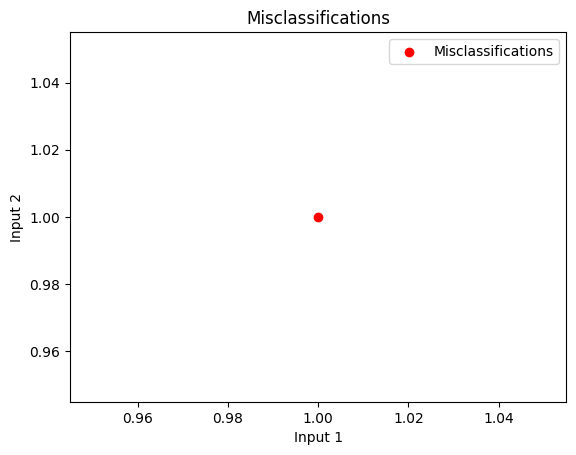

In [ ]:

import matplotlib.pyplot as plt

def activation(out, threshold):
    if out >= threshold:
        return 1
    else:
        return 0

def perceptron():
    b = [0, 1, 0, 1]
    y = [0, 0, 0, 1]  # Actual Output
    w = [0.1, 0.8]  # Manually assigned weights
    threshold = 1
    learning_rate = 0.5
    a = [1, 0, 1, 1]
    errors = 0

    print("Initial Weights: " + str(w))

    misclassifications = []

    for i in range(4):
        summation = a[i] * w[0] + b[i] * w[1]
        o = activation(summation, threshold)
        print("Input: " + str(a[i]) + "," + str(b[i]))
        print("Weights: " + str(w[0]) + ", " + str(w[1]))
        print("Summation: " + str(summation) + ", Threshold: " + str(threshold))
        print("Actual Output: " + str(y[i]) + ", Predicted Output: " + str(o))
        if o != y[i]:
            errors += 1
            misclassifications.append((a[i], b[i]))

    print("Number of Errors: " + str(errors))

    # Perceptron Learning Algorithm
    while errors != 0:
        errors = 0
        for i in range(4):
            summation = a[i] * w[0] + b[i] * w[1]
            o = activation(summation, threshold)
            if o != y[i]:
                errors += 1
                w[0] = w[0] + learning_rate * (y[i] - o) * a[i]
                w[1] = w[1] + learning_rate * (y[i] - o) * b[i]
                print("\nMisclassification occurred for input:", (a[i], b[i]))
                print("Updated Weights: " + str(w[0]) + ", " + str(w[1]))

    print("\nFinal Weights: " + str(w))

    # Plot misclassifications
    if misclassifications:
        x, y = zip(*misclassifications)
        plt.scatter(x, y, color='red', label='Misclassifications')
        plt.xlabel('Input 1')
        plt.ylabel('Input 2')
        plt.title('Misclassifications')
        plt.legend()
        plt.show()

    return w

# Test the perceptron for AND gate
weights = perceptron()

Streaming output truncated to the last 5000 lines.

Number of Errors: 2
Weights after this iteration: [1.1, 1.3]

Misclassification occurred for input: (1, 0)
Updated Weights: 0.6000000000000001, 1.3

Misclassification occurred for input: (1, 0)
Updated Weights: 1.1, 1.3

Number of Errors: 2
Weights after this iteration: [1.1, 1.3]

Misclassification occurred for input: (1, 0)
Updated Weights: 0.6000000000000001, 1.3

Misclassification occurred for input: (1, 0)
Updated Weights: 1.1, 1.3

Number of Errors: 2
Weights after this iteration: [1.1, 1.3]

Misclassification occurred for input: (1, 0)
Updated Weights: 0.6000000000000001, 1.3

Misclassification occurred for input: (1, 0)
Updated Weights: 1.1, 1.3

Number of Errors: 2
Weights after this iteration: [1.1, 1.3]

Misclassification occurred for input: (1, 0)
Updated Weights: 0.6000000000000001, 1.3

Misclassification occurred for input: (1, 0)
Updated Weights: 1.1, 1.3

Number of Errors: 2
Weights after this iteration: [1.1, 1.3]

Mi